# CS530 Homework 7 Part 2

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

from scipy.spatial import distance

from statistics import *



Queston 1 (1 points) 

a. Fit a KNN classifier on the Heart Disease dataset from Homework 6 (data is also included in the folder here) using the Scikit-learn package, plot your ROC curve on the testing set and compute the AUC. 


25


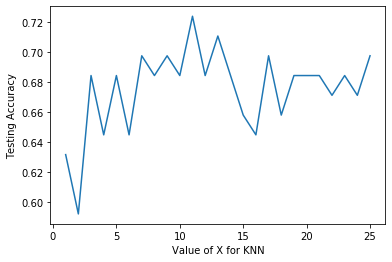

In [9]:

# Your code goes here

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.drop(train.columns[train.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
test.drop(test.columns[test.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

X_train = train.drop(['target'], axis = 1)
y_train = train.target


neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)


X_test = test.drop(['target'], axis = 1)
y_test = test.target



k_range = range(1, 26)
scores = []
y_preds = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
print(len(scores))

plt.plot(k_range, scores)
plt.xlabel("Value of X for KNN")
plt.ylabel("Testing Accuracy")
plt.show()

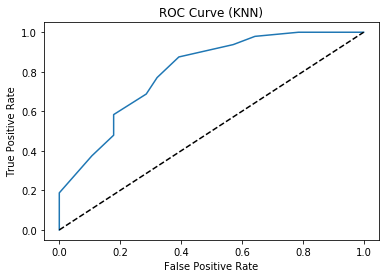

AUC:  0.7994791666666666


In [10]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (KNN)')
plt.plot([0,1],[0,1], 'k--')
plt.show()
knn_probs = y_scores[:, 1]


knn_auc = roc_auc_score(y_test, knn_probs)
print("AUC: ", knn_auc)



b. Compare your result with HW6. Does KNN do better on the classification? Explain


knn does not do better on the classificaton. we can see that the auc here is approximateely .8. In LDA we saw around .85 and log reg around .92. This could be because an exponentially large training set is typically required to predict reasonably accurately.

Question 2 (2 points) Implement from scratch the function MyKNN() that classifies the matrix X_test (samples × features) using the KNN algorithm we learned in class. The inputs for the function should be the training set X_train, the labels y_train, the parameter k, and the matrix X_test. The output for the function should be y_test, your prediction for the label of X_test. Test your function on the Iris dataset and compare it to the KNN classifier (use the default parameters other than n_neighbors) of scikit-learn for that dataset (as in Question 1).


In [14]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

pred_knn = knn.predict(X_test)
print("ACCURACY (sklearn): ", knn.score(X_test, y_test))



ACCURACY (sklearn):  0.9733333333333334


In [15]:
def MyKNN(X_train, y_train, k, X_test):
    y_test = []

    for i in range(len(X_test)):        
        distances = []
        for j in range(len(X_train)):
            dst = distance.euclidean( X_test[i,:], X_train[j,:])
            distances.append(dst)
            
        minDists = np.argsort(distances)[:3]        

        y_test.append(mean(y_train[minDists]))
    return y_test

y_test = MyKNN(X_train, y_train, k, X_test)

print(y_test)


[2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2]


In [16]:
print("ACCURACY (MyKNN):", knn.score(X_test, y_test))

ACCURACY (MyKNN): 0.92


The accuracies between my function MyKNN and the the sklearn function are very similar. Depending on the test and training sets that are split, one is slightly higher than the other, and a couple times that I ran it, they were actually the same.

Question 3 (3 points) 

a. Create two 2-dimensional Gaussian (normal) distribution with mean (1,0) and (-1,0), and the identity matric as their covariance matrices. Create labels for the data of the two distribution, apply train-test-split, and use KNN to make a prediction on the test set. (Hint: Use the [numpy.random.multivariate_normal](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html) to create normal distribution dataset) 

In [21]:
import numpy as np
# Your code goes here
mean = [[1,0],[-1,0]]
cov = np.identity(2)

X1 = np.random.multivariate_normal(mean[0],cov,1000)
X2 = np.random.multivariate_normal(mean[1],cov,1000)
y1 = np.zeros(len(X1))
y2 = np.ones(len(X2))

X = np.concatenate((X1, X2), axis = 0)
y = np.concatenate((y1, y2), axis = 0)

def pred_with_KNN(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .66)

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    pred_knn = knn.predict(X_test)
    score = knn.score(X_test, y_test)
    return score, pred_knn

score, pred_knn = pred_with_KNN(X, y)

print("PREDICTIONS: ", pred_knn)
print("ACCURACY: ", score)

PREDICTIONS:  [0. 1. 1. ... 0. 1. 1.]
ACCURACY:  0.8


b. Now, we want to create Gaussians of dimensions 1 to 100 to see what happens to KNN as the number of dimensions close. Therefore, use a for loop to simulate two Gaussian distributions with dimensions from 1 to 100. Keep the distance between the center of the two distributions the same. One way to do this is to have the mean of the one distribution bee (1,0,0,...,0) and the other one be (-1,0,0,...,0). In other words, both Gaussians would have their center at 0 in all dimensions except $x_1$. Keep the covariance matrices as identity matrices. Hence, the distance between the two distributions will always be 2. Now, as before, apply a train-test-split, predict on the test set, and record the accuracies in each iteration of the loop. Finally, plot your accuracies over the number of dimensions using matplotlib.

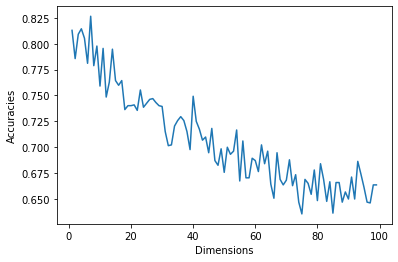

In [22]:
# Your code goes here
scores = []
dimensions = []

for i in range(1, 100):
    
    dimensions.append(i)
    zeros = np.zeros(i-1)
    mean0= np.insert(zeros, 0, 1, axis=0)
    mean1 = np.insert(zeros, 0, -1, axis = 0)
    mean = [mean0, mean1]
    cov = np.identity(i)
    
    x1 = np.random.multivariate_normal(mean[0],cov,1000)
    x2 = np.random.multivariate_normal(mean[1],cov,1000)
    
    y1 = np.zeros(len(x1))
    y2 = np.ones(len(x2))

    X = np.concatenate((x1, x2), axis = 0)
    y = np.concatenate((y1, y2), axis = 0)

    score, pred = pred_with_KNN(X,y)
    
    scores.append(score)
    
plt.plot(dimensions, scores)
plt.xlabel("Dimensions")
plt.ylabel("Accuracies")
plt.show()


c. Discuss what you found in the accuracy plot in 3b. Why do you think you got those results?

I found that as the number of dimensions increases, the accuracy decreases.  More dimensions lead to sparser tiling of the space which can interfere with thee performance of KNN, which is why this would occur. this is called the curse of dimensionality. In other words, with higher dimensions, we would need exponentially more samples to define the sapce, which we don't have, causing the accuracy to decrease as dimensions increase.